# Import Required Libraries
Import the necessary libraries, including pandas, numpy, and folium.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

# Load Data
Load the dataset containing latitude and longitude information.

In [ ]:
# Load Data
data = pd.read_csv('data/ev_stations_v1.csv')  # Replace with your file path
data.head()  # Display the first few rows of the dataset

C:\Users\rdinh\AppData\Local\Temp\ipykernel_1428\3910194436.py:2: DtypeWarning: Columns (6,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/ev_stations_v1.csv')  # Replace with your file path


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Extract Latitude and Longitude
Extract the latitude and longitude columns from the dataset.

In [ ]:
# Extract Latitude and Longitude
latitude = data['Latitude']
longitude = data['Longitude']

# Display the first few rows of the latitude and longitude columns
pd.DataFrame({'Latitude': latitude, 'Longitude': longitude}).head()

,Latitude,Longitude
0,34.248319,-118.387971
1,34.052542,-118.448504
2,34.040539,-118.271387
3,34.059133,-118.248589
4,33.759802,-118.096665


# Generate Heatmap
Use the folium library to generate a heatmap based on the extracted latitude and longitude data.

In [ ]:
# Generate Heatmap
from folium.plugins import HeatMap

# Create a base map
base_map = folium.Map(location=[latitude.mean(), longitude.mean()], zoom_start=10)

# Prepare the data for the heatmap
heat_data = [[lat, lon] for lat, lon in zip(latitude, longitude)]

# Add the heatmap to the base map
HeatMap(heat_data, radius=12).add_to(base_map)

# Display the map
base_map

In [ ]:
lvl1 = data['EV Level1 EVSE Num']
lvl2 = data['EV Level2 EVSE Num']
lvlf = data['EV DC Fast Count']

df = pd.DataFrame({'Level 1': lvl1, 'Level 2': lvl2, 'DC Fast': lvlf}).sum()

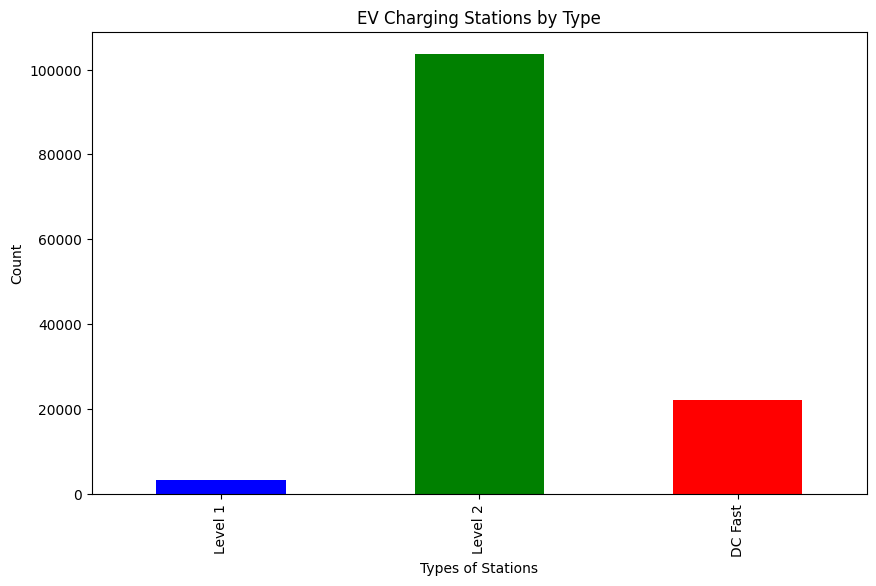

In [ ]:
df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.title('EV Charging Stations by Type')
plt.xlabel('Types of Stations')
plt.ylabel('Count')

# Show the plot
plt.show()